<a href="https://colab.research.google.com/github/haileyayay/deeplearning/blob/master/VGG_Exercises_Sequential_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning REVIEW !

## CIFAR-10

### Your name :

#### 실습목표<br>
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

# 라이브러리 & 데이터 준비 

In [1]:
import numpy as np
import pandas as pd
import random as rd

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 8s 0us/step


In [19]:


X = tf.keras.layers.Input(shape=[32, 32, 3])

H = tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='swish')(X)
H = tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', activation='swish')(H)
H = tf.keras.layers.Conv2D(128, kernel_size=3, padding='same',activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(256, kernel_size=3, padding='same',activation='swish')(H)
H = tf.keras.layers.Conv2D(256, kernel_size=3, padding='same',activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(4096, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X,Y)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer= 'adam', metrics='accuracy')

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 256)         2951

In [16]:
## 강사님 코드 
## model.add 구조


from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = keras.models.Sequential(  )

 # First Convolutional Block
model.add( Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same',
                  activation='relu', input_shape = (32, 32, 3) )    )
model.add( Conv2D(64, (3,3), padding='same', activation='relu') )
model.add( MaxPool2D((2,2)))

 # Second Convolutional Block
model.add( Conv2D(128, (3,3), padding='same', activation='relu') )
model.add( Conv2D(128, (3,3), padding='same', activation='relu') )
model.add( MaxPool2D((2,2)))

# Third Convolutional Block
model.add( Conv2D(256, (3,3), padding='same', activation='relu') )
model.add( Conv2D(256, (3,3), padding='same', activation='relu') )
model.add( MaxPool2D((2,2)))


model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 256)        

In [17]:
##Sequential 모델 - model add와 같은 params

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu',
                  padding='same', input_shape=[32,32,3]),    
    layers.Conv2D(filters=64, kernel_size=3, activation='relu',
                  padding='same'),
    layers.MaxPool2D(pool_size=(2,2)),

    # Second Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation='relu',
                  padding='same'),    
    layers.Conv2D(filters=128, kernel_size=3, activation='relu',
                  padding='same'),
    layers.MaxPool2D(pool_size=(2,2)),
    
    
    # Third Convolutional Block
    layers.Conv2D(filters=256, kernel_size=3, activation='relu',
                  padding='same'),    
    layers.Conv2D(filters=256, kernel_size=3, activation='relu',
                  padding='same'),
    layers.MaxPool2D(pool_size=(2,2)),    


    layers.Flatten(), #1차원으로 바뀐다
    layers.Dense(units=4096, activation='relu'),
    layers.Dense(units=10, activation='sigmoid')
    
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 256)        

In [3]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 2065
다음 그림은 Bird 입니다.


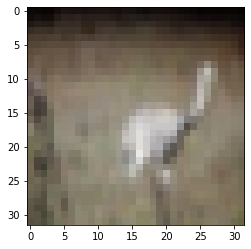

In [7]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format( labels[y_test[id][0]] ))
plt.imshow(x_test[id])
plt.show()

# X : Min-max Scaling!

**Hint**

$X_{scaled} \leftarrow { X - min(X) \over{max(X)  -  min(X)}  }$

In [ ]:
min_ = x_train.min()
max_ = x_train.max()

def scaler(x):
    boonja = x - min_
    boonmo = max_ - min_
    return boonja/boonmo

In [ ]:
x_train = scaler(x_train)
x_test = scaler(x_test)

# Y : One-Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# X, Y 모양 확인

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# VGG(mini-ver) 모델링!

* [참고해야하는 논문](https://arxiv.org/pdf/1409.1556.pdf)
* **미니버전 제작!**
* 컴파일까지!
* model 에 모델을 선언할 것

# 학습!
* 적절한 batch size!
* epochs는 20번만.

# 결과 확인 작업

In [ ]:
## 원핫인코딩 해제
y_train = y_train.argmax(axis=1)
y_test = y_test.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
pred_train = model.predict(x_train).argmax(axis=1)
pred_test = model.predict(x_test).argmax(axis=1)

logi_train_accuracy = accuracy_score(y_train, single_pred_train)
logi_test_accuracy = accuracy_score(y_test, single_pred_test)


print('CNN')
print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[y_test[id]]))
print('모델의 예측 : {}'.format(labels[pred_test[id]]))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if y_test[id] == pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(x_test[id].reshape([32,32,-1]))
plt.show()

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (y_test == pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[y_test[id]]))
print('모델의 예측 : {}'.format(labels[pred_test[id]]))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if y_test[id] == pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(x_test[id].reshape([32,32,-1]))
plt.show()